# Ejercicios 5 (Proyecto Final)

## Entrega Domingo 9 de Diciembre

1. Pesos en la función de correlación (estimador de Landy-Salay)

###### a) Construye dos anillos concéntricos de radios distintos y ancho fijo, pero que el radio mayor del anillo más pequeño sea igual al radio menor del anillo más grande (ie ambos anillos deben de verse como un solo anillo del doble de ancho). La densidad de ambos anillos debe de ser igual. Grafica la distribución poniendo color rojo a los puntos del anillo pequeño y azul a los del grande.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import csv
from random import random

%matplotlib inline
rcParams['figure.figsize'] = (10,10)

In [3]:
def anillo(R, r, c, densidad, lado): #Radio mayor, radio menor, centro, numero de puntos, lado de la caja
    x0, y0 = c
    i = 0 #Contador
    x, y = [], [] #Arreglos de las coordenadas
    
    #Calculamos el numero de puntos de acuerdo a la densidad establecida
    puntos = densidad *np.pi * (R**2 - r**2) # #Puntos = densidad * area
    
    #Generamos los puntos aleatorios en el anillo
    while i < puntos:
        
        #X y Y son las coordenadas de los puntos
        X = lado*np.random.random()
        Y = lado*np.random.random()
        
        if (X-x0)**2 + (Y-y0)**2 > R**2 or (X-x0)**2 + (Y-y0)**2 < r**2: #Si las coordenadas estan fuera del anillo las descartamos
            continue
            
        #Agregamos al arreglo las coordenadas que esten dentro del anillo y de la caja
        if (X < lado and X > 0) and (Y < lado and Y > 0):
            x.append(X)
            y.append(Y)
        i += 1
    #Graficamos el anillo
    return x, y

In [4]:
lado = 1000 #Lado de la caja
R = 300 # Radio mayor del anillo mayor
ancho = 30 #Ancho del anillo
r = R - ancho #Radio menor del anillo mayor (radio mayor del anillo menor)
r_min = r - ancho #Radio menor del anillo menor
densidad = 0.02 #Densidad de puntos
centro = (lado * 0.5, lado * 0.5) #Centro del anillo

In [5]:
AnilloX, AnilloY = anillo(R, r, centro, densidad, lado) 
anilloX, anilloY = anillo(r, r_min, centro, densidad, lado)

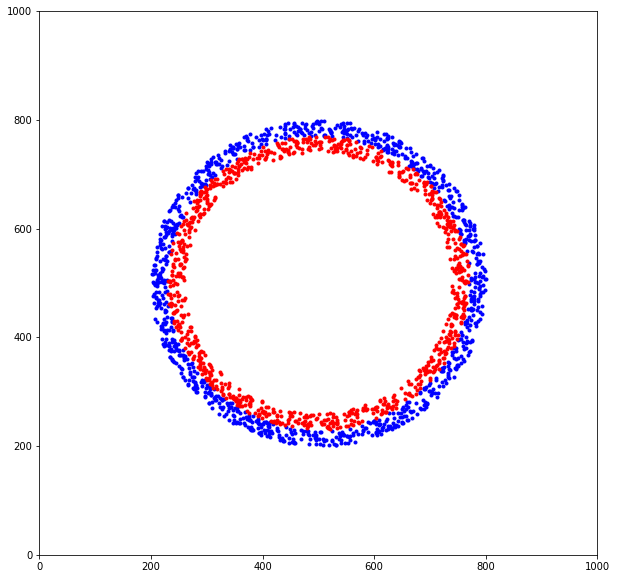

In [6]:
plt.plot(AnilloX, AnilloY, "b.")
plt.plot(anilloX, anilloY, "r.")
plt.xlim([0, 1000])
plt.ylim([0, 1000]);

###### b) Mide la función de correlación asignando los siguientes pesos a cada punto: para puntos en el anillo pequeño (rojos) usa un peso de 2, mientras que para puntos en el anillo grande (azules) usa 1/2. Sobrepon en una gráfica la función de correlación sin pesos con la de pesos, y describe las diferencias en palabras.

In [7]:
#Esta funcion genera los valores de bins para la distancia de puntos en una muestra

def hist_bins(tam_bins, lado, coord): #Tamaño de bins, tamaño de la caja, coordenadas de puntos
    X, Y = coord
    dist_max = np.sqrt(2) * lado #distancia maxima posile en la caja
    
    #Calculamos todas las distancias
    n = len(X)
    dist = [0 for i in range(int(n*(n-1)/2))]
    k = 0
    for i in range(n-1):
        for j in range(i+1, n):
            dist[k] = (np.sqrt((X[j]-X[i])**2 + (Y[j]-Y[i])**2))
            k += 1
    
    bins = np.arange(0, dist_max, tam_bins) #arreglo para los bins
    bins_val, bins_edges = np.histogram(dist, bins = bins) #Calculamos el histograma de las distancias 
    return dist, bins_val, bins_edges #Devolvemos el valor de los bins solamente

In [8]:
#Funcion que devuelve valores de bins para distancia entre puntos aleatorios y de los datos

def hist_DR(tam_bins, lado, coord_random, coord_data): #Numero de bins, coord. de puntos aleatorios, coord. de puntos de datos
    Xr, Yr = coord_random #Coordenadas de aleatorios
    Xd, Yd = coord_data #Coord. de datos
    dist_max = np.sqrt(2) * lado
    
    Nr = len(Xr) #Numero de puntos aleatorios
    Nd = len(Xd) #Numero de datos
    dist = [0 for i in range(Nd*Nr)]
    k = 0
    #Calculamos distancias
    for i in range(Nr):
        for j in range(Nd):
            dist[k] = (np.sqrt((Xd[j]-Xr[i])**2 + (Yd[j]-Yr[i])**2))
            k += 1
    
    bins = np.arange(0, dist_max, tam_bins)
    DR = np.histogram(dist, bins = bins)
    return DR[0]

In [16]:
tam_bins = 5

dist_A, DD_A, bins_edges = hist_bins(tam_bins, lado, (AnilloX, AnilloY))
bins_edges = bins_edges[:-1]

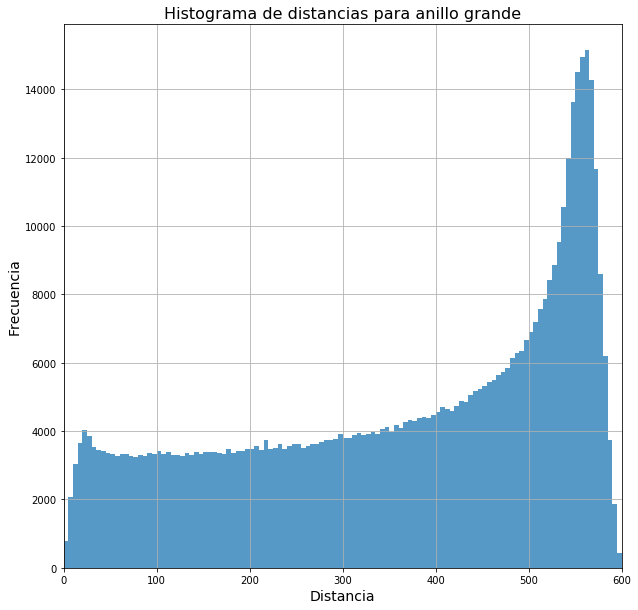

In [20]:
plt.hist(dist_A, bins = bins_edges, alpha = 0.75)
plt.title("Histograma de distancias para anillo grande", fontsize = 16)
plt.xlabel("Distancia", fontsize = 14)
plt.ylabel("Frecuencia", fontsize = 14)
plt.xlim([0, 600])
plt.grid();

In [21]:
dist_a, DD_a, bins_edges = hist_bins(tam_bins, lado, (anilloX, anilloY))
bins_edges = bins_edges[:-1]

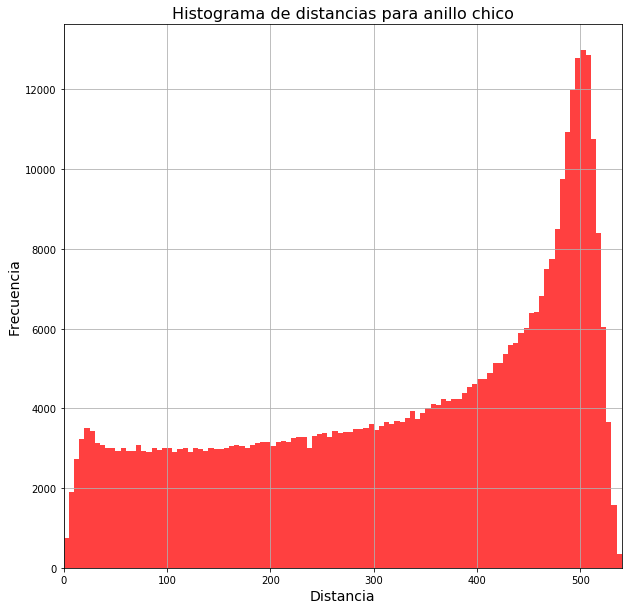

In [24]:
plt.hist(dist_a, bins = bins_edges, facecolor = "r", alpha = 0.75)
plt.title("Histograma de distancias para anillo chico", fontsize = 16)
plt.xlabel("Distancia", fontsize = 14)
plt.ylabel("Frecuencia", fontsize = 14)
plt.xlim([0, 540])
plt.grid();

Se puede notar que los dos histogramas de distancias para los anillos son equivalentes. La única diferencia son los límites de las distancias, pues corresponden al diámetro de los anillos. Pero a simple vista se aprecia que el ancho del último pico es aproximadamente igual en los dos casos. Éste muestra el ancho de los anillos.

Abajo se ven los dos histogramas sobrepuestos y normalizados:

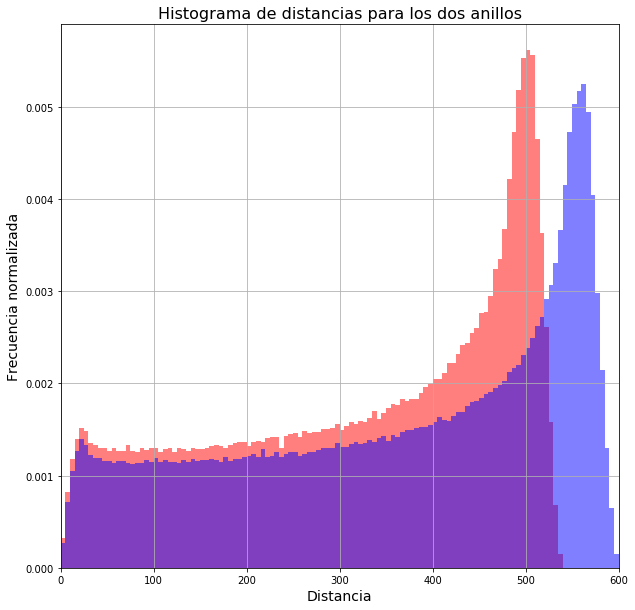

In [28]:
plt.hist(dist_a, bins = bins_edges, density = True, facecolor = "r", alpha = 0.5)
plt.hist(dist_A, bins = bins_edges, density = True, facecolor = "b", alpha = 0.5)
plt.title("Histograma de distancias para los dos anillos", fontsize = 16)
plt.xlabel("Distancia", fontsize = 14)
plt.ylabel("Frecuencia normalizada", fontsize = 14)
plt.xlim([0, 600])
plt.grid();

2.  De partículas a una malla. Usa la rutina [scipy.interpolate.griddata](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html). Sugerencia revisa el ejemplo de las notas de clase y el de la página anterior.

    a) Crea una malla de 100x100, e interpola los datos del anillo y de los multiples anillos a esta malla. Grafíca los datos de la malla como gráfica de densidad y pon los puntos originales encimados. Llamaremos a esta malla y sus valores, el campo. Utiliza los tres métodos de interpolación: más cercano, lineal y cúbico 1D.
    
    b) Calcula la función de correlación (estimador de Landy-Salay) para ambas muestras de datos usando los putos de la malla, y asignando un peso en cada punto dado por el valor del campo en ese punto. Grafica la función de correlación obtenida por este método de malla y compárala en la misma gráfica con la obtenida en base a los puntos originales. ¿Se parecen? ¿Dónde cambia? ¿Cómo cambia con los diferentes métodos de interpolación?
    
    c) Calcula la transformada de Fourier de este campo discreto (ie de la malla) para ambas muestras de datos, y obtén los espectros de potencia como el valor de expectación del producto de dos campos en este espacio de Fourier. Gráfica tanto el campo en el espacio de Fourier, como el espectro de potencias. ¿Cómo cambian los resultados del espectro de potencias con los diferentes métodos de interpolación?
    
    c) Utiliza la transformada de Fourier inversa para encontrar la función de correlación a partir de los espectros de potencia anteriores, y compáralos con los que encontraste en el inciso b).